In [3]:
# load dataset

import pandas as pd

df = pd.read_csv('data.csv')
print(df.head())

  State_Name District_Name  Crop_Year       Season   Crop  Area  Production
0  Karnataka         KOLAR       1998  Kharif       Onion  3090       14100
1  Karnataka         KOLAR       1998  Rabi         Onion  1226       16070
2  Karnataka         KOLAR       1998  Summer       Onion  1032       15017
3  Karnataka         KOLAR       1999  Whole Year   Onion  3614       52778
4  Karnataka         KOLAR       2000  Whole Year   Onion  3819       33520


In [4]:
# clean dataset

df.drop(df[df['Crop_Year'] == 1997].index, inplace = True)
df.drop(df[df['Crop_Year'] == 2015].index, inplace = True)
print(df)
df.to_csv('cleaned.csv')


     State_Name District_Name  Crop_Year       Season   Crop  Area  Production
0     Karnataka         KOLAR       1998  Kharif       Onion  3090       14100
1     Karnataka         KOLAR       1998  Rabi         Onion  1226       16070
2     Karnataka         KOLAR       1998  Summer       Onion  1032       15017
3     Karnataka         KOLAR       1999  Whole Year   Onion  3614       52778
4     Karnataka         KOLAR       2000  Whole Year   Onion  3819       33520
...         ...           ...        ...          ...    ...   ...         ...
1329  Karnataka         KOLAR       2013  Rabi         Onion   791        5558
1330  Karnataka         KOLAR       2013  Summer       Onion     3          24
1331  Karnataka         KOLAR       2014  Kharif       Onion   395        2029
1332  Karnataka         KOLAR       2014  Rabi         Onion   329        2180
1333  Karnataka         KOLAR       2014  Summer       Onion     7          34

[1334 rows x 7 columns]


<ipython-input-5-002acf241fa4>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  production_year = df.groupby(['Crop_Year']).sum()


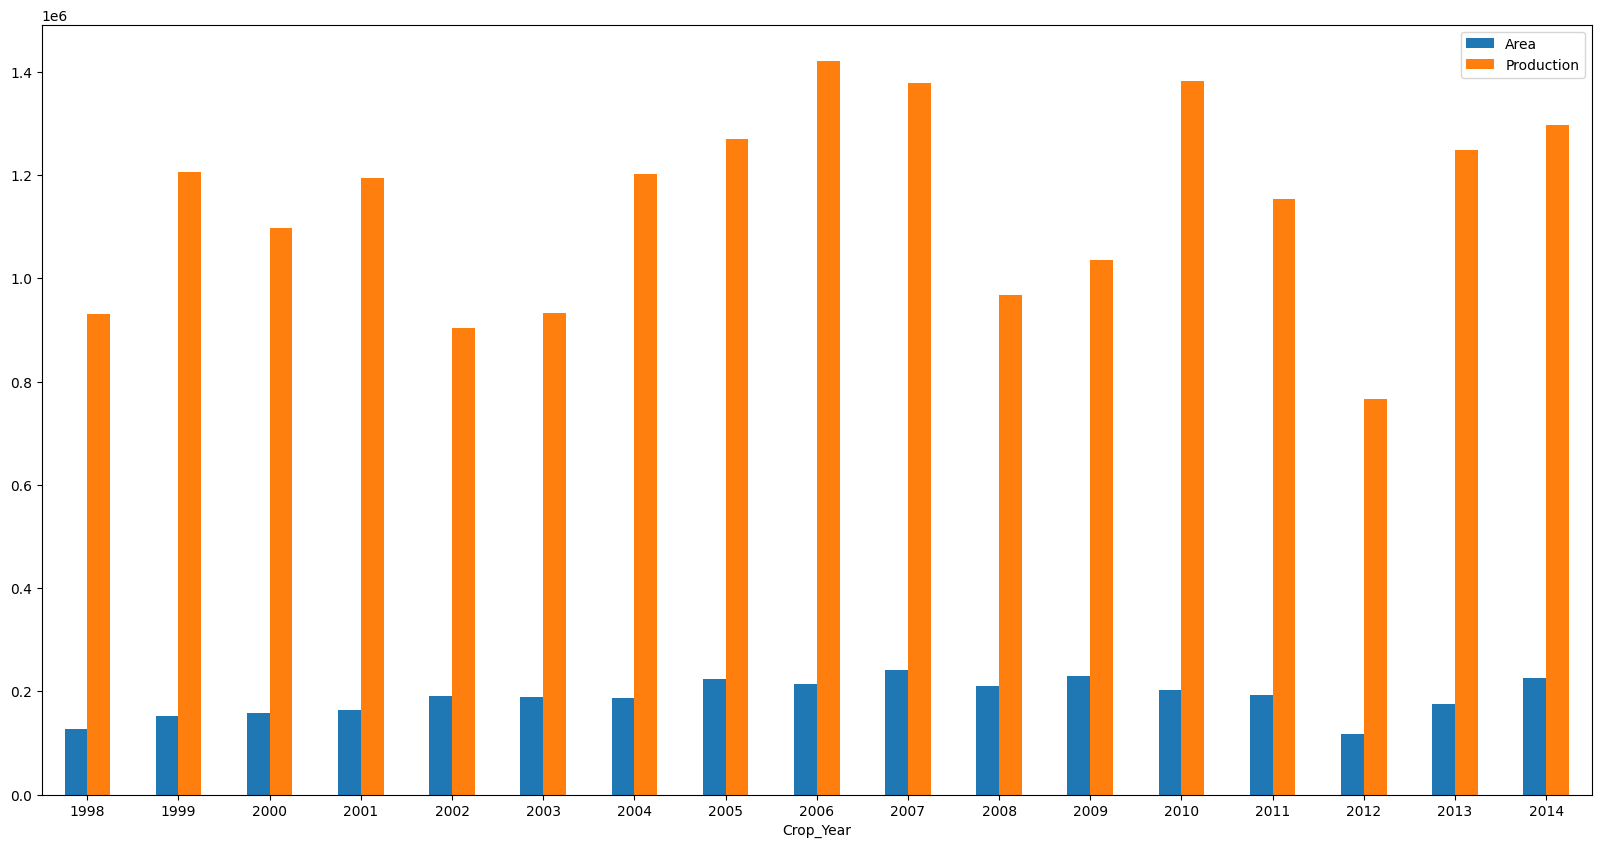

In [5]:
# production by year

production_year = df.groupby(['Crop_Year']).sum()
ax = production_year.plot.bar(rot=0, figsize=(20, 10))

<ipython-input-6-c06849c5bcf2>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  production_season_year = df.groupby(['Season']).mean()


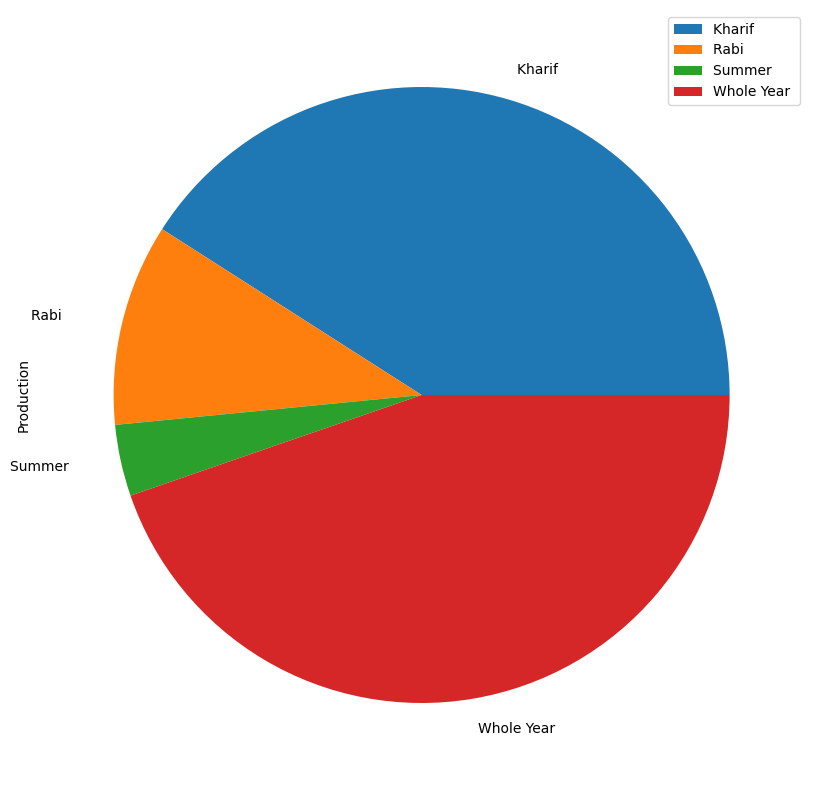

In [6]:
# production by season and year

production_season_year = df.groupby(['Season']).mean()
production_season_year

ax = production_season_year.plot.pie(y='Production', figsize=(30, 10))

<ipython-input-7-53389ac4732c>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  production_crop = production_crop.groupby(['Crop']).mean()


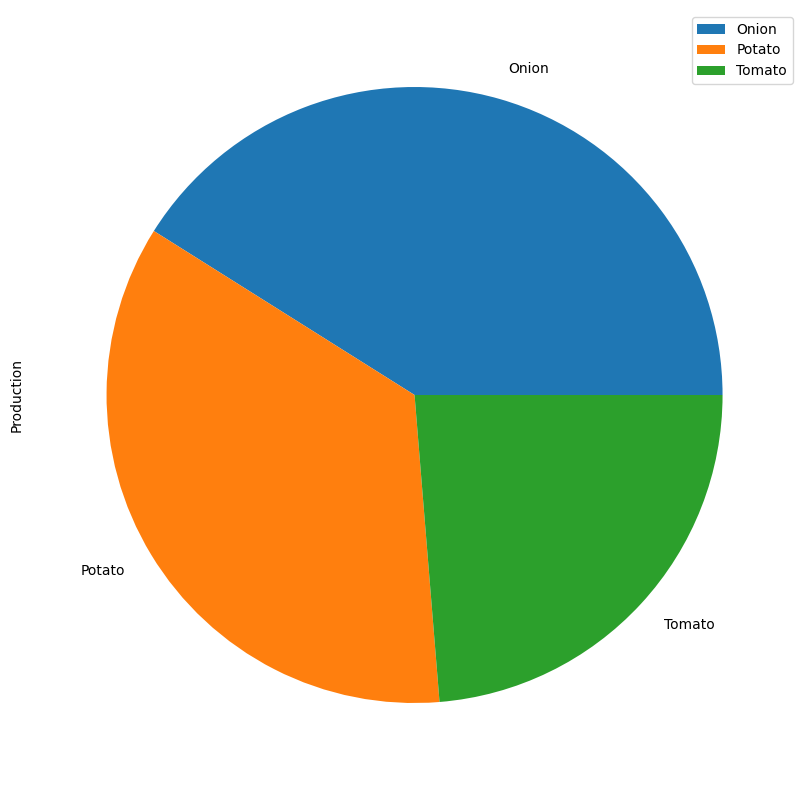

In [7]:
# production by crop and year

production_crop = df.drop(columns = 'Crop_Year')
production_crop = production_crop.groupby(['Crop']).mean()

ax = production_crop.plot.pie(y='Production', figsize=(30, 10))

In [8]:
# production conversion to numeric type

df['Production'] = pd.to_numeric(df['Production'], errors='coerce')
df
     

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Karnataka,KOLAR,1998,Kharif,Onion,3090,14100
1,Karnataka,KOLAR,1998,Rabi,Onion,1226,16070
2,Karnataka,KOLAR,1998,Summer,Onion,1032,15017
3,Karnataka,KOLAR,1999,Whole Year,Onion,3614,52778
4,Karnataka,KOLAR,2000,Whole Year,Onion,3819,33520
...,...,...,...,...,...,...,...
1329,Karnataka,KOLAR,2013,Rabi,Onion,791,5558
1330,Karnataka,KOLAR,2013,Summer,Onion,3,24
1331,Karnataka,KOLAR,2014,Kharif,Onion,395,2029
1332,Karnataka,KOLAR,2014,Rabi,Onion,329,2180


In [9]:
# grouping area and production

year_area_production = df.groupby(['Crop_Year'])['Area','Production'].mean()
year_area_production = year_area_production.reset_index(level=0, inplace=False)
year_area_production
     

<ipython-input-9-c83f230fb658>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  year_area_production = df.groupby(['Crop_Year'])['Area','Production'].mean()


,Crop_Year,Area,Production
0,1998,1487.593023,10824.674419
1,1999,4356.228571,34430.857143
2,2000,3966.400000,27445.475000
3,2001,4230.025641,30626.666667
4,2002,3000.578125,14114.156250
5,2003,2900.769231,14352.153846
6,2004,4584.756098,29319.317073
7,2005,2390.159574,13505.925532
8,2006,5235.682927,34637.390244
9,2007,2446.414141,13921.454545


In [10]:
# Area:production calculation

year_area_production['Avg_Production'] = year_area_production['Production'] / year_area_production['Area']
year_area_production
     

,Crop_Year,Area,Production,Avg_Production
0,1998,1487.593023,10824.674419,7.276637
1,1999,4356.228571,34430.857143,7.903822
2,2000,3966.400000,27445.475000,6.919492
3,2001,4230.025641,30626.666667,7.240303
4,2002,3000.578125,14114.156250,4.703812
5,2003,2900.769231,14352.153846,4.947706
6,2004,4584.756098,29319.317073,6.394957
7,2005,2390.159574,13505.925532,5.650638
8,2006,5235.682927,34637.390244,6.615639
9,2007,2446.414141,13921.454545,5.690555


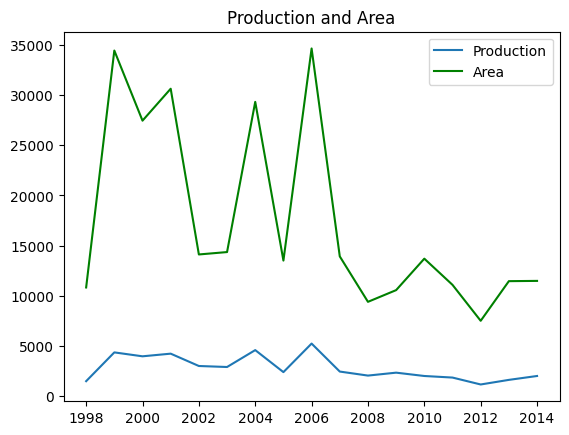

In [11]:
# comparison of production and area for each year

import matplotlib.pyplot as plt


x_axis = year_area_production.Crop_Year
y_axis = year_area_production.Area
y1_axis = year_area_production.Production

plt.plot(x_axis, y_axis)
plt.plot(x_axis, y1_axis,color='g')

plt.title("Production and Area")
plt.legend(["Production", "Area"])
plt.rcParams['figure.figsize'] = [20, 10]

plt.show()

Using machine learning models to predict the values

---


**Random Forest Regression**

In [12]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# splitting and model fitting
x = year_area_production.iloc[:,0:1].values # crop_year
y = year_area_production.iloc[:,3].values # avg_production

regressor = RandomForestRegressor()

regressor.fit(x,y)

RandomForestRegressor()

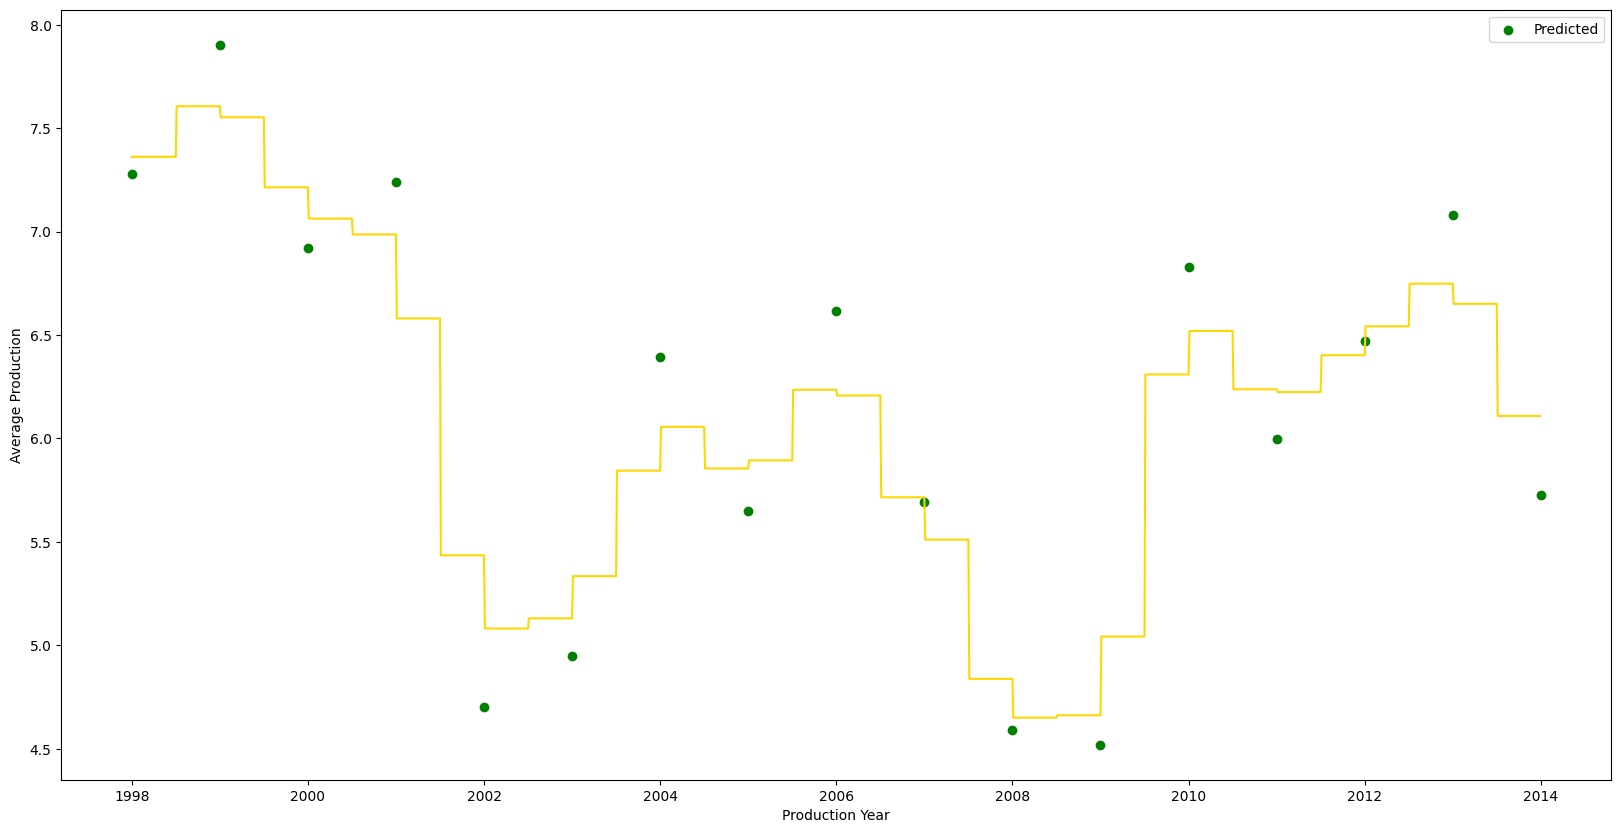

In [13]:

# actual vs predicted values

import numpy as np

x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape(len(x_grid),1)
plt.scatter(x,y,color='g')
plt.xlabel("Production Year")
plt.ylabel("Average Production")
plt.legend(["Predicted"])
plt.plot(x_grid, regressor.predict(x_grid), color='gold')
plt.show()


In [14]:
# predicting for the test values

y_pred = regressor.predict(x)
y_pred

regressor.score(x,y)

0.8845395980894925

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(y_true=y,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.2905367675523518
MSE: 0.11629038854762949
RMSE: 0.3410137659210101
